# Facebook Prophet Forecast

In [1]:
# Load Drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import necessary packages
import datetime
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import numpy as np
from datetime import date

In [3]:
googletrends = pd.read_csv("/content/drive/MyDrive/MSBA/Spring/APRD 6342 Vargo/Advertising Project/fb2013.csv",
                               skiprows = [0,1], parse_dates=["Week"])

In [4]:
googletrends

,Week,Hulu: (United States)
0,2013-10-06,94
1,2013-10-13,85
2,2013-10-20,80
3,2013-10-27,83
4,2013-11-03,82
...,...,...
258,2018-09-16,74
259,2018-09-23,100
260,2018-09-30,80
261,2018-10-07,76


In [5]:
prophetdata = pd.DataFrame()
prophetdata['y'] = googletrends['Hulu: (United States)']
prophetdata['ds'] = googletrends['Week']

In [6]:
m = Prophet(changepoint_prior_scale=.1)
m.fit(prophetdata)
future = m.make_future_dataframe(periods=52, freq='W')
future.tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1eavdkgi/odchrao4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1eavdkgi/8f04sw95.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20956', 'data', 'file=/tmp/tmp1eavdkgi/odchrao4.json', 'init=/tmp/tmp1eavdkgi/8f04sw95.json', 'output', 'file=/tmp/tmp1eavdkgi/prophet_modeldojeb6we/prophet_model-20230501204638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:46:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:46:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
310,2019-09-15
311,2019-09-22
312,2019-09-29
313,2019-10-06
314,2019-10-13


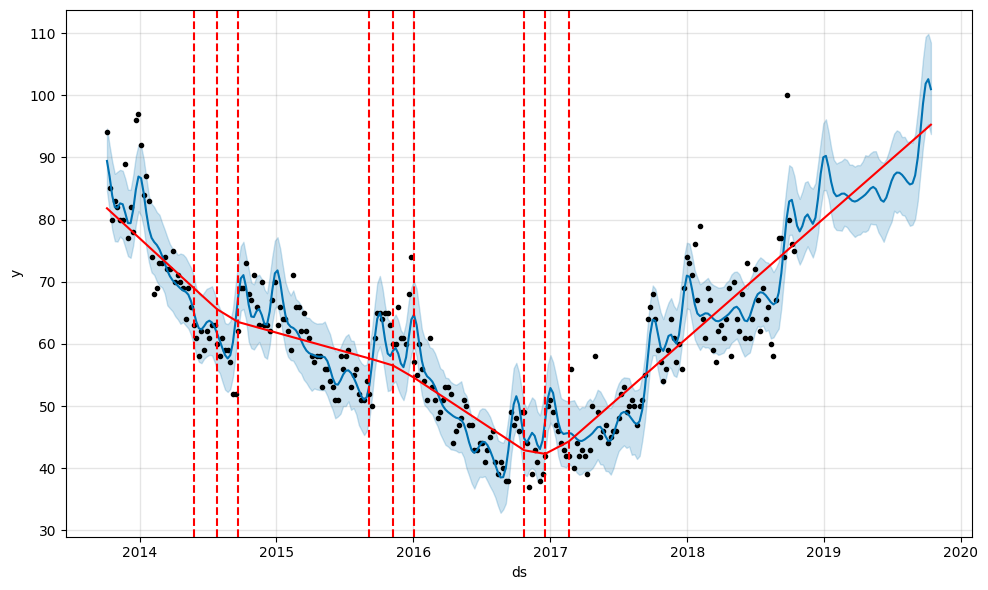

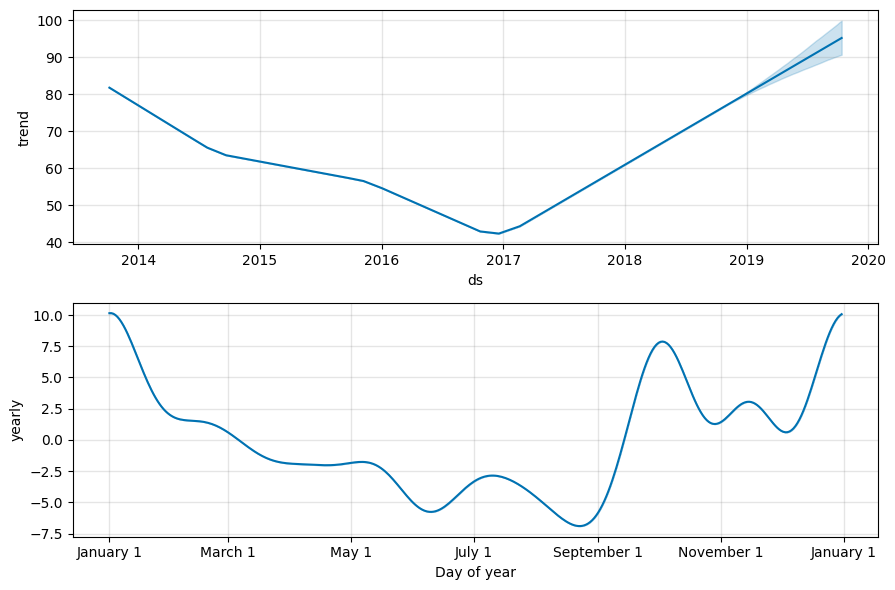

In [7]:
#basic model with 
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1eavdkgi/ikkc8wpw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1eavdkgi/b3n3mqjs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29602', 'data', 'file=/tmp/tmp1eavdkgi/ikkc8wpw.json', 'init=/tmp/tmp1eavdkgi/b3n3mqjs.json', 'output', 'file=/tmp/tmp1eavdkgi/prophet_modelcinguhqw/prophet_model-20230501204643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:46:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:46:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


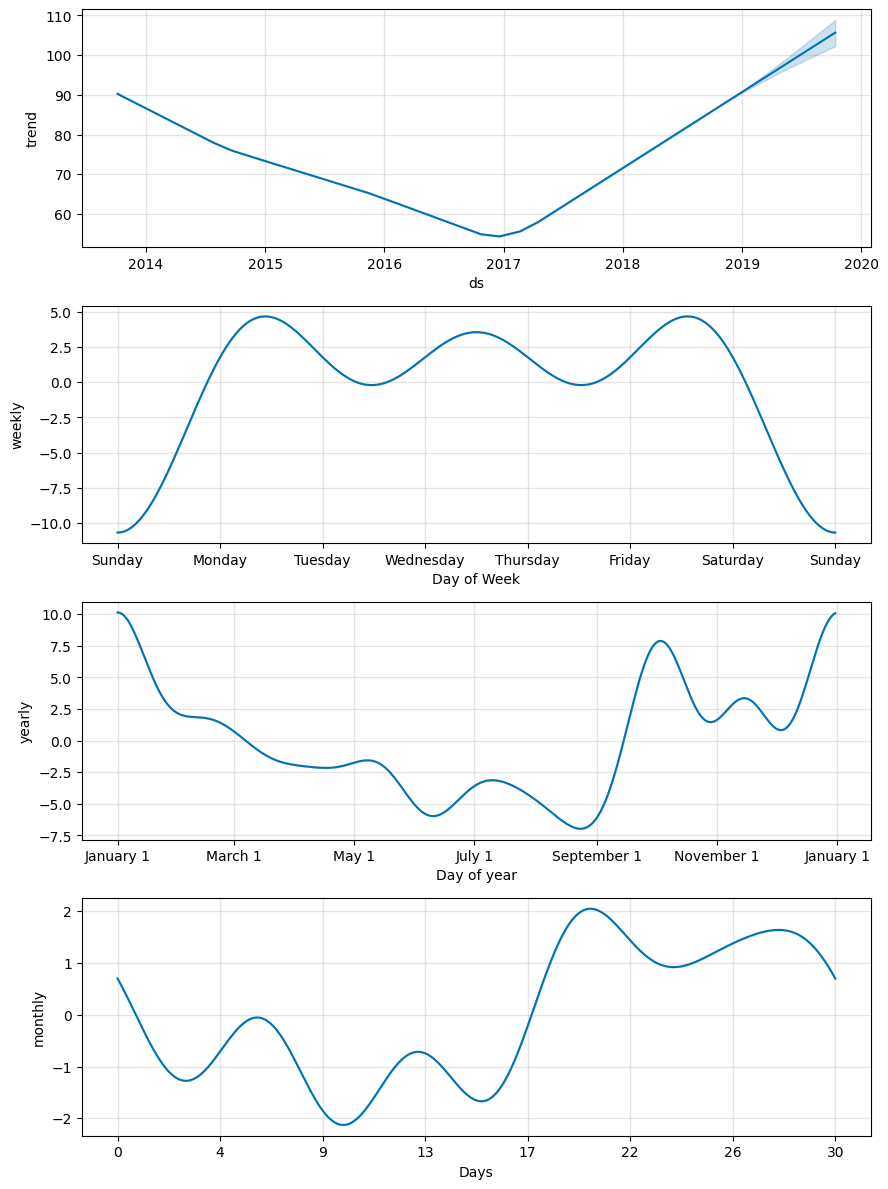

In [8]:
#weekly and monthly seasonality
m = Prophet(weekly_seasonality=True)

m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m.fit(prophetdata)

future = m.make_future_dataframe(periods=52, freq='W')

forecast = m.predict(future)

fig = m.plot_components(forecast)

# Learning More About The Data


In [9]:
import statsmodels
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from time import sleep
import csv

import pandas as pd
import numpy as np

import seaborn as sns

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as pyplot
import statsmodels.api as sm

In [10]:
googletrends.set_index('Week', inplace=True) 

In [11]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
adf_test(googletrends['Hulu: (United States)'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.099979
p-value                          0.244523
#Lags Used                       7.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64


In the above code, we can see that the data is not stationary, because the test statistic is less than the critical values at all three significance levels, meaning we cannot reject the null hypothesis. The p-value is also greater than 0.05, which further supports that the data is non-stationary. Therefore, our model should remove stationarity from our data. 

In [12]:
googletrends['trends_diff_1'] = googletrends['Hulu: (United States)'].diff(1)

<Axes: xlabel='Week'>

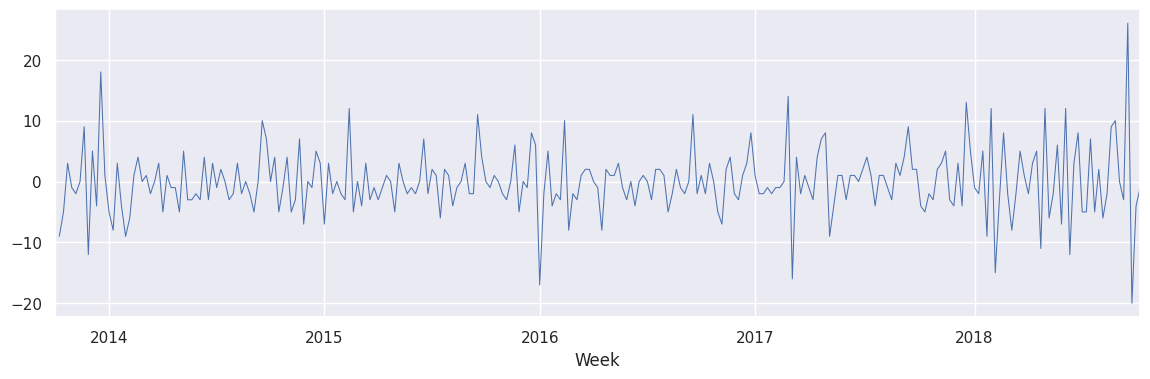

In [13]:
pd.plotting.register_matplotlib_converters()
sns.set(rc={'figure.figsize':(14, 4)})
googletrends['trends_diff_1'].plot(linewidth=0.75)

In [14]:
adf_test(googletrends['trends_diff_1'][1:])

Results of Dickey-Fuller Test:
Test Statistic                -9.058684e+00
p-value                        4.626186e-15
#Lags Used                     6.000000e+00
Number of Observations Used    2.550000e+02
Critical Value (1%)           -3.456257e+00
Critical Value (5%)           -2.872942e+00
Critical Value (10%)          -2.572846e+00
dtype: float64


Our p-value is low, meaning the data is now stationary, which means that it has a constant mean and variance over time, and has statistical properties that do not change over time, which makes the time series easier to model and analyze. 

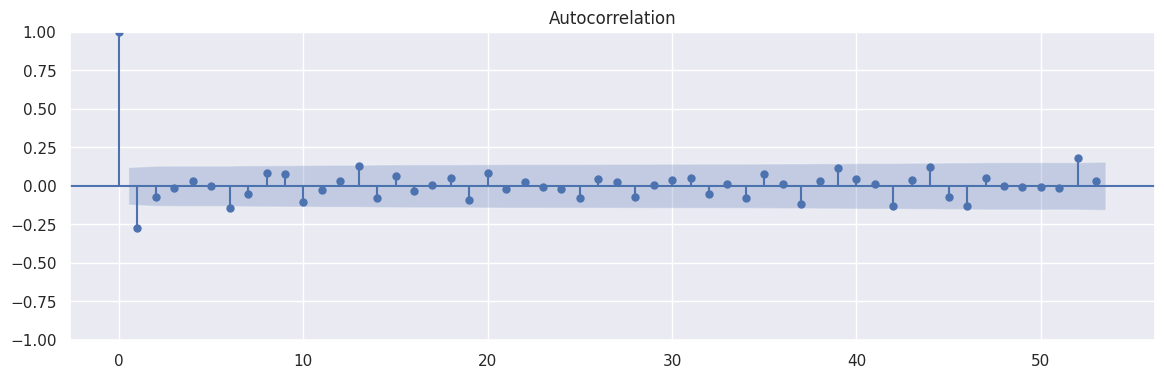

In [15]:
plot_acf(googletrends['trends_diff_1'][1:], lags=53);

Looking at the lag effect, we can see that AR(1), AR(6), AR(13), and AR(52) are worth considering for the model. 

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


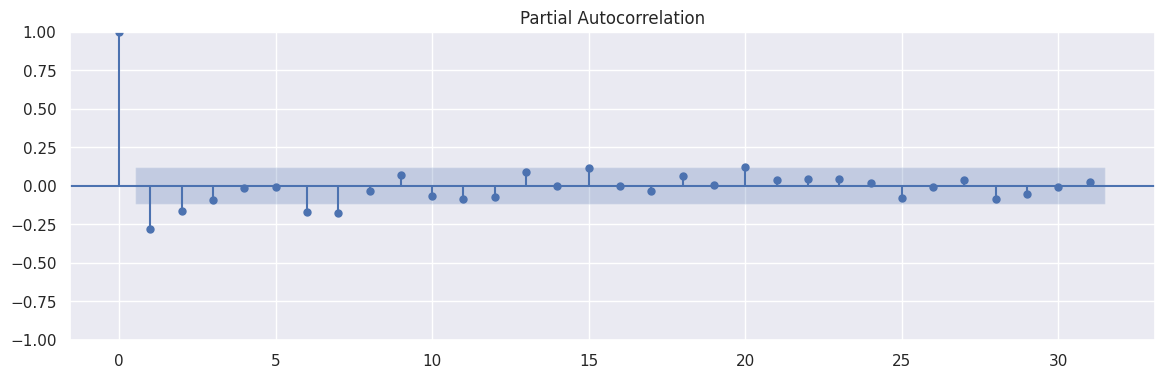

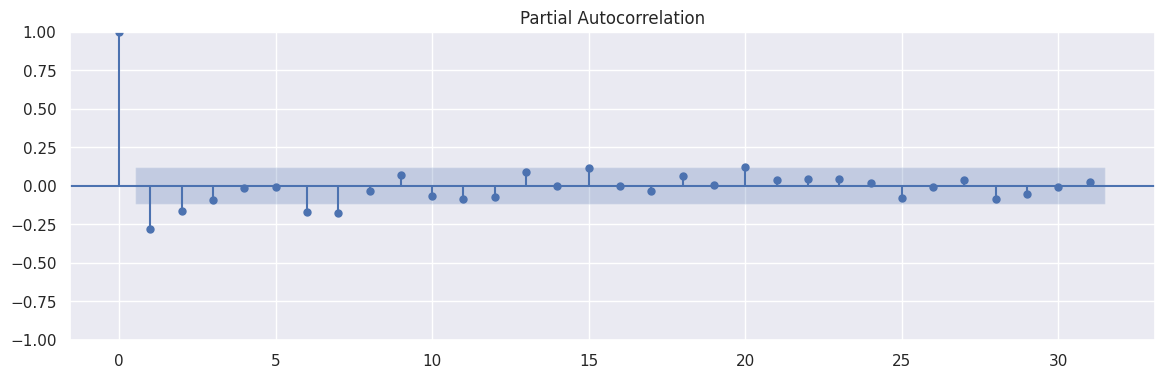

In [16]:
plot_pacf(googletrends['trends_diff_1'][1:], lags=31)

MA(1), MA(2), MA(6), and MA(7) are outside of the blue shaded region, which suggest that the differenced time series may have signficant autocorrlation at these lags and that an MA model may be appropriate. 

# Basic ARIMA Model - To Compare As a Baseline

In [17]:
model = ARIMA(googletrends['Hulu: (United States)'], order=(13,1,6)) 
model_fit = model.fit()
summary = model_fit.summary().as_text()
for aline in summary.split(','):
  print(aline)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

                                 SARIMAX Results                                 
Dep. Variable:     Hulu: (United States)   No. Observations:                  263
Model:                   ARIMA(13
 1
 6)   Log Likelihood                -779.873
Date:                   Mon
 01 May 2023   AIC                           1599.747
Time:                           20:46:56   BIC                           1671.114
Sample:                       10-06-2013   HQIC                          1628.431
                            - 10-14-2018                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4080      0.275     -1.486      0.137      -0.946       0.130
ar.L2          0.4195      0.326      1.287      0.198      -0.219       1.058
ar.L3          0.2393      0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
model = ARIMA(googletrends['Hulu: (United States)'], order=(3,1,3)) 
model_fit = model.fit()
summary = model_fit.summary().as_text()
for aline in summary.split(','):
  print(aline)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:     Hulu: (United States)   No. Observations:                  263
Model:                    ARIMA(3
 1
 3)   Log Likelihood                -787.258
Date:                   Mon
 01 May 2023   AIC                           1588.517
Time:                           20:46:58   BIC                           1613.495
Sample:                       10-06-2013   HQIC                          1598.556
                            - 10-14-2018                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9066      0.261      7.309      0.000       1.395       2.418
ar.L2         -1.0897      0.435     -2.503      0.012      -1.943      -0.236
ar.L3          0.0871      0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
model = ARIMA(googletrends['Hulu: (United States)'], order=(1,1,1)) 
model_fit = model.fit()
summary = model_fit.summary().as_text()
for aline in summary.split(','):
  print(aline)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:     Hulu: (United States)   No. Observations:                  263
Model:                    ARIMA(1
 1
 1)   Log Likelihood                -793.361
Date:                   Mon
 01 May 2023   AIC                           1592.722
Time:                           20:46:59   BIC                           1603.427
Sample:                       10-06-2013   HQIC                          1597.025
                            - 10-14-2018                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4108      0.110      3.730      0.000       0.195       0.627
ma.L1         -0.7578      0.086     -8.775      0.000      -0.927      -0.589
sigma2        24.9595      1

<ipython-input-20-7cea896a7046>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, hist=True, kde=True)


<Axes: ylabel='Density'>

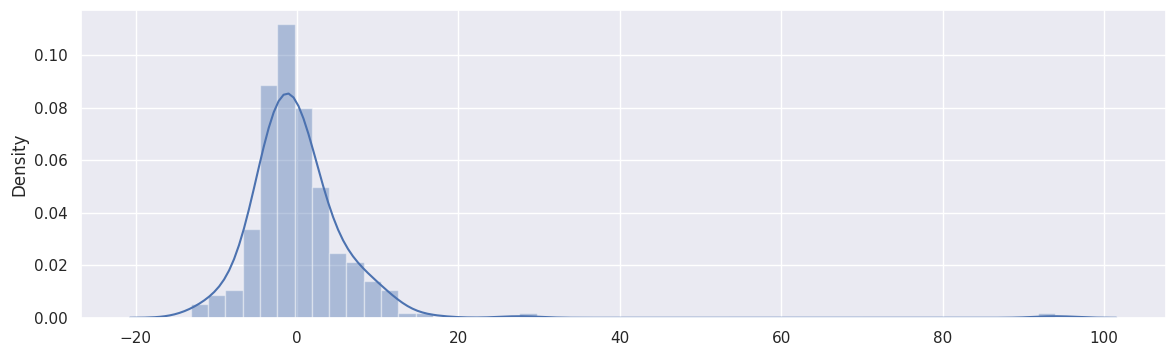

In [20]:
residuals = pd.DataFrame(model_fit.resid)
sns.distplot(residuals, hist=True, kde=True)

In [21]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(residuals)) 

[1.54595324]


In [22]:
absresiduals = abs(residuals)
print(np.mean(abs(residuals)))

0    4.016974
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Our model has a durbin_watson that is closer to 2 than 1, which means that there may still be some positive autocorrelation present, but that it is not severe. 

In [23]:
model_fit.aic

1592.7222203594788

# Combining adspend with Google Trends

In [24]:
#loading in adspend data 
adspend = pd.read_csv("/content/drive/MyDrive/MSBA/Spring/APRD 6342 Vargo/Advertising Project/hulu.adspend.csv")

In [25]:
adspend.head()

,TIME PERIOD,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),SYNDICATION DOLS (000),SPOT TV DOLS (000),MAGAZINES DOLS (000),SUNDAY MAGS DOLS (000),NATL NEWSP DOLS (000),NEWSPAPER DOLS (000),NETWORK RADIO DOLS (000),NAT SPOT RADIO DOLS (000),OUTDOOR DOLS (000)
0,"WEEK OF OCT 07, 2013 (B)",Hulu : Online,47.8,0.0,0.0,0.0,47.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"WEEK OF OCT 07, 2013 (B)",Hulu Online & Hulu Plus Online : Combo,4.2,0.0,0.0,0.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"WEEK OF OCT 07, 2013 (B)",Hulu Plus : Online,763.2,0.0,363.8,379.9,19.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"WEEK OF OCT 14, 2013 (B)",Hulu : Online,40.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"WEEK OF OCT 14, 2013 (B)",Hulu Online & Hulu Plus Online : Combo,3.6,0.0,0.0,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#removing WEEK OF in the time period column
adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace("WEEK OF ", "")

In [27]:
#removing (B) in the time period column
adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace("\(B\)", "")  

<ipython-input-27-0cddbb062ac2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace("\(B\)", "")


In [28]:
adspend.head()

,TIME PERIOD,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),SYNDICATION DOLS (000),SPOT TV DOLS (000),MAGAZINES DOLS (000),SUNDAY MAGS DOLS (000),NATL NEWSP DOLS (000),NEWSPAPER DOLS (000),NETWORK RADIO DOLS (000),NAT SPOT RADIO DOLS (000),OUTDOOR DOLS (000)
0,"OCT 07, 2013",Hulu : Online,47.8,0.0,0.0,0.0,47.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"OCT 07, 2013",Hulu Online & Hulu Plus Online : Combo,4.2,0.0,0.0,0.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"OCT 07, 2013",Hulu Plus : Online,763.2,0.0,363.8,379.9,19.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"OCT 14, 2013",Hulu : Online,40.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"OCT 14, 2013",Hulu Online & Hulu Plus Online : Combo,3.6,0.0,0.0,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#renaming columns
adspend.columns = adspend.columns.str.replace(" DOLS \(000\)", "") 

<ipython-input-29-84a4260290f4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  adspend.columns = adspend.columns.str.replace(" DOLS \(000\)", "")


In [30]:
adspend.columns

Index(['TIME PERIOD', 'PRODUCT', 'TOTAL', 'NETWORK TV', 'CABLE TV',
       'SYNDICATION', 'SPOT TV', 'MAGAZINES', 'SUNDAY MAGS', 'NATL NEWSP',
       'NEWSPAPER', 'NETWORK RADIO', 'NAT SPOT RADIO', 'OUTDOOR'],
      dtype='object')

In [31]:
adspend['FIXED TIME'] = pd.to_datetime(adspend['TIME PERIOD'])

In [32]:
#finding total ad spend per week 
adspendnoproducts = adspend.pivot_table(index='FIXED TIME', aggfunc=np.sum)

<ipython-input-32-320ed526a361>:2: FutureWarning: The operation <function sum at 0x7fa4fc4a7d00> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  adspendnoproducts = adspend.pivot_table(index='FIXED TIME', aggfunc=np.sum)


In [33]:
adspendnoproducts

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,SYNDICATION,TOTAL
FIXED TIME,,,,,,,,,,,,
2013-10-07,363.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.5,0.0,379.9,815.2
2013-10-14,325.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.2,0.0,250.5,619.8
2013-10-21,369.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.5,0.0,253.9,668.3
2013-10-28,400.6,0.0,0.0,0.0,1.7,0.0,0.0,563.5,45.9,0.0,143.3,1155.0
2013-11-04,402.3,0.0,0.0,0.0,4.0,430.8,0.0,0.0,48.3,0.0,152.6,1038.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-03,15.8,0.0,46.5,0.0,0.0,584.0,0.0,0.0,42.9,0.0,0.0,689.3
2018-09-10,23.0,0.0,46.5,0.0,0.0,584.0,0.0,0.0,8.8,0.0,0.0,662.4
2018-09-17,642.4,0.0,46.5,0.0,0.0,4754.4,0.0,0.0,26.6,0.0,0.0,5470.0


In [34]:
adspendnoproducts['FIXED DATE'] = adspendnoproducts.index - pd.DateOffset(1)

In [35]:
adspendnoproducts['FIXED DATE']

FIXED TIME
2013-10-07   2013-10-06
2013-10-14   2013-10-13
2013-10-21   2013-10-20
2013-10-28   2013-10-27
2013-11-04   2013-11-03
                ...    
2018-09-03   2018-09-02
2018-09-10   2018-09-09
2018-09-17   2018-09-16
2018-09-24   2018-09-23
2018-10-01   2018-09-30
Name: FIXED DATE, Length: 261, dtype: datetime64[ns]

In [36]:
adspendnoproducts.index = adspendnoproducts['FIXED DATE']
del adspendnoproducts['FIXED DATE']

In [37]:
adspendnoproducts.head()

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,SYNDICATION,TOTAL
FIXED DATE,,,,,,,,,,,,
2013-10-06,363.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.5,0.0,379.9,815.2
2013-10-13,325.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.2,0.0,250.5,619.8
2013-10-20,369.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.5,0.0,253.9,668.3
2013-10-27,400.6,0.0,0.0,0.0,1.7,0.0,0.0,563.5,45.9,0.0,143.3,1155.0
2013-11-03,402.3,0.0,0.0,0.0,4.0,430.8,0.0,0.0,48.3,0.0,152.6,1038.0


In [38]:
googletrends['TOTAL ADSPEND'] = adspendnoproducts['TOTAL']

In [39]:
googletrends.head()

,Hulu: (United States),trends_diff_1,TOTAL ADSPEND
Week,,,
2013-10-06,94,NaN,815.2
2013-10-13,85,-9.0,619.8
2013-10-20,80,-5.0,668.3
2013-10-27,83,3.0,1155.0
2013-11-03,82,-1.0,1038.0


In [40]:
googletrends = googletrends[:-2]

In [41]:
googletrends

,Hulu: (United States),trends_diff_1,TOTAL ADSPEND
Week,,,
2013-10-06,94,NaN,815.2
2013-10-13,85,-9.0,619.8
2013-10-20,80,-5.0,668.3
2013-10-27,83,3.0,1155.0
2013-11-03,82,-1.0,1038.0
...,...,...,...
2018-09-02,77,10.0,689.3
2018-09-09,77,0.0,662.4
2018-09-16,74,-3.0,5470.0


# Sarimax Modeling

In [42]:
model = sm.tsa.statespace.SARIMAX(
    googletrends['Hulu: (United States)'],
    trend='t',
    order=(1, 1, 1),
    exog=googletrends['TOTAL ADSPEND'],
    seasonal_order=(1, 0, 0, 12)
)
model_fit = model.fit(disp=False)
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:               Hulu: (United States)   No. Observations:                  261
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -786.548
Date:                             Mon, 01 May 2023   AIC                           1585.097
Time:                                     20:47:02   BIC                           1606.461
Sample:                                 10-06-2013   HQIC                          1593.685
                                      - 09-30-2018                                         
Covariance Type:                               opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
drift             0.0005      0.001      0.913      0.361      -0.001       0.002
TOTAL ADSPEND     

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The above model includes yearly seasonality, which we observed mainly in the winter months. This is an improvement over our basline ARIMA model. However, the seasonal component is not significant. 

In [43]:
model = sm.tsa.statespace.SARIMAX(
    googletrends['Hulu: (United States)'],
    trend='t',
    order=(0, 1, 1),
    exog=googletrends['TOTAL ADSPEND'],
    seasonal_order=(1, 0, 0, 6)
)
model_fit = model.fit(disp=False)
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:              Hulu: (United States)   No. Observations:                  261
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 6)   Log Likelihood                -783.923
Date:                            Mon, 01 May 2023   AIC                           1577.846
Time:                                    20:47:03   BIC                           1595.649
Sample:                                10-06-2013   HQIC                          1585.003
                                     - 09-30-2018                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
drift             0.0011      0.001      0.907      0.364      -0.001       0.003
TOTAL ADSPEND  5.696e-05  

In this model, we included 6-month seasonality, which was significant and further improved the fit of our model. 


We can see that adding in the exogenous variables improved the fit, but the p-value is not significant and the coefficient for total adspend is very small. This is our best model of the ones we tested, as teh HQIC is the lowest, all p-values except drift and adspend are both significant. 

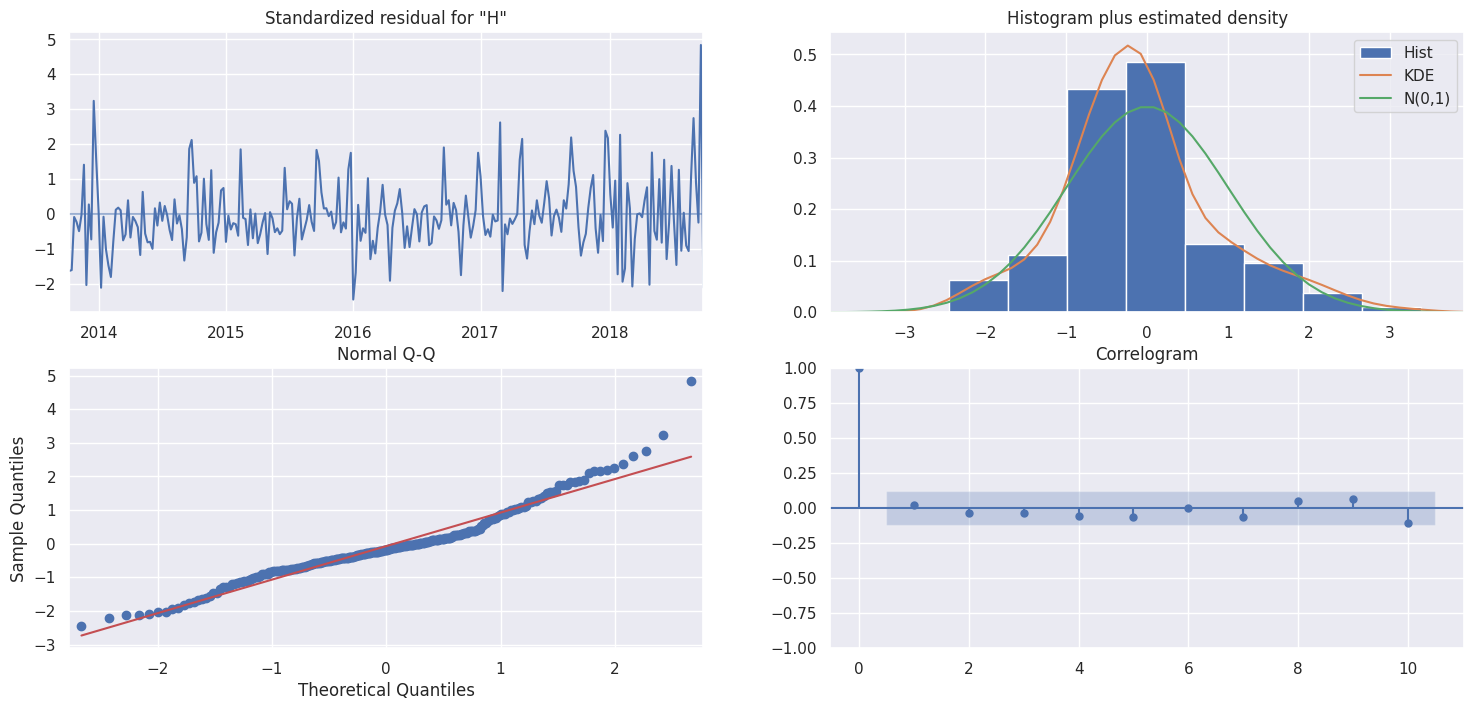

In [44]:
model_fit.plot_diagnostics(figsize=(18, 8))
plt.show()

The residuals of this model are fairly uniform with increased error at the end of 2018. 

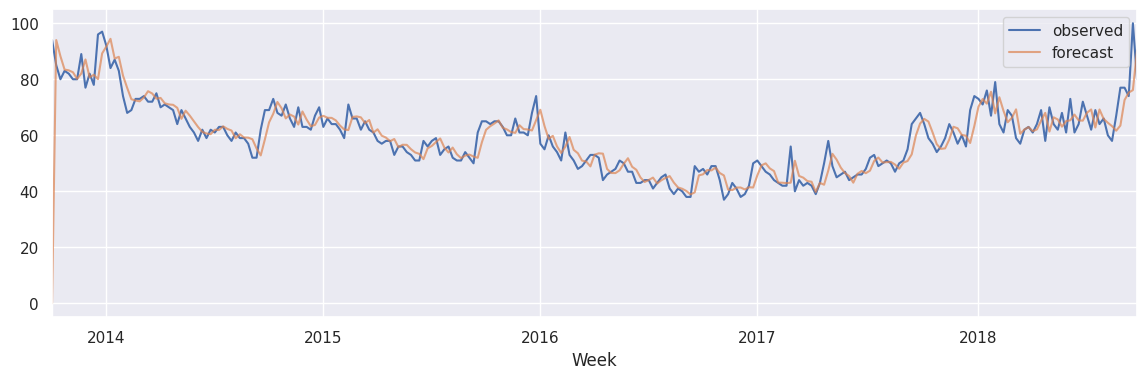

In [45]:
pred = model_fit.get_prediction()
pred_ci = model_fit.conf_int()
ax = googletrends['Hulu: (United States)'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='forecast', alpha=.7, figsize=(14, 4))
plt.legend()
plt.show()


In [46]:
model_fit.aic

1577.8459553415826

<ipython-input-47-7cea896a7046>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, hist=True, kde=True)


<Axes: ylabel='Density'>

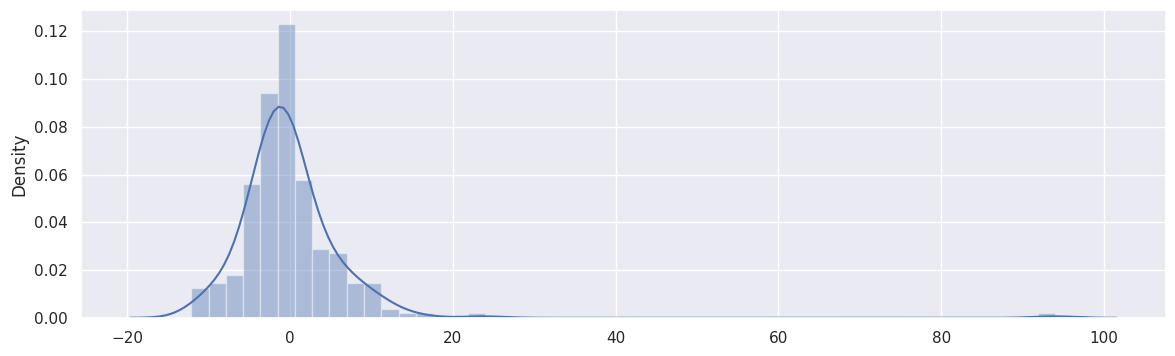

In [47]:
residuals = pd.DataFrame(model_fit.resid)
sns.distplot(residuals, hist=True, kde=True)

In [48]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(residuals)) 

[1.49591616]


In [49]:
absresiduals = abs(residuals)
print(np.mean(abs(residuals)))

0    3.94668
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# LASSO Regression - Above and Beyond

In [50]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)
pd.options.mode.chained_assignment = None
from sklearn.linear_model import LassoLarsCV

In [51]:
#creating a new array that contains the rolling average computed by taking the average of the current 
#and previous 3 values in the total ad spend column
adspend_trend = googletrends['TOTAL ADSPEND'].rolling(window=4).mean().fillna(0).values.reshape(-1, 1)

<Axes: xlabel='Week'>

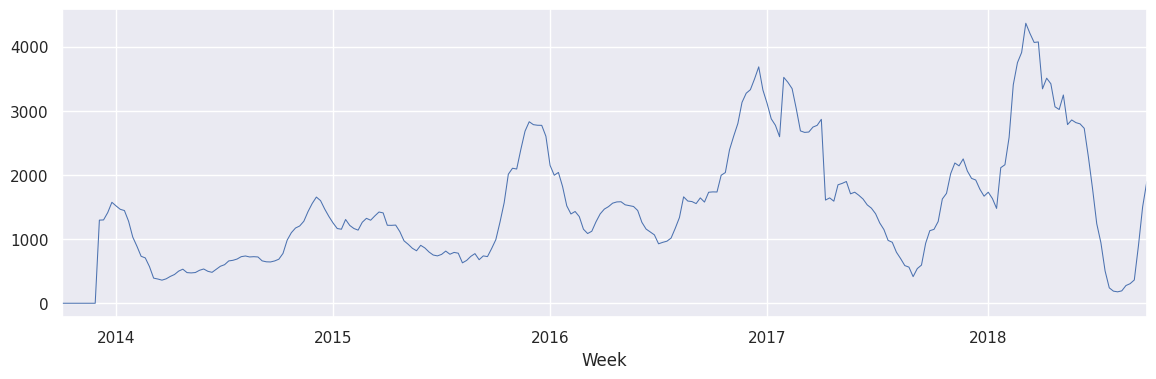

In [58]:
pd.plotting.register_matplotlib_converters()
sns.set(rc={'figure.figsize':(14, 4)})
googletrends['TOTAL ADSPEND'].rolling(window=10).mean().fillna(0).plot(linewidth=0.75)

<Axes: xlabel='Week'>

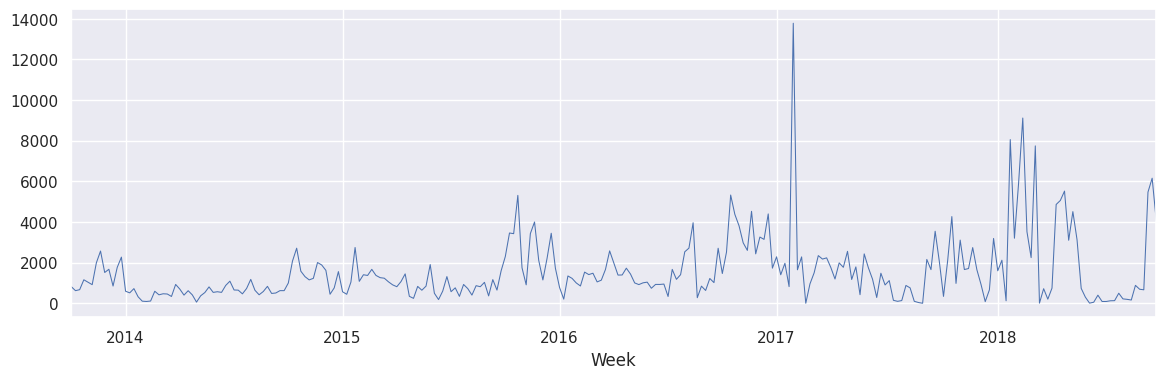

In [53]:
#comparing the graph to the above
googletrends['TOTAL ADSPEND'].plot(linewidth=0.75)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1eavdkgi/8y7mf0gy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1eavdkgi/dzs07kgx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78631', 'data', 'file=/tmp/tmp1eavdkgi/8y7mf0gy.json', 'init=/tmp/tmp1eavdkgi/dzs07kgx.json', 'output', 'file=/tmp/tmp1eavdkgi/prophet_modelm6p46kns/prophet_model-20230501205417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:54:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:54:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-64-4d3e134a0c90>:45: User

    X (predictor)  coefficient
0   total_adspend     0.000200
1          yearly     0.189784
2           trend     0.718468
3      AR - Lag 1     0.308827
4  additive_terms     0.513324
R-square training: 0.8803167581326857
MSE: 17.85218715190288
MAE: 3.1040740520826886
Durbin-Watson: 1.9774109236811381


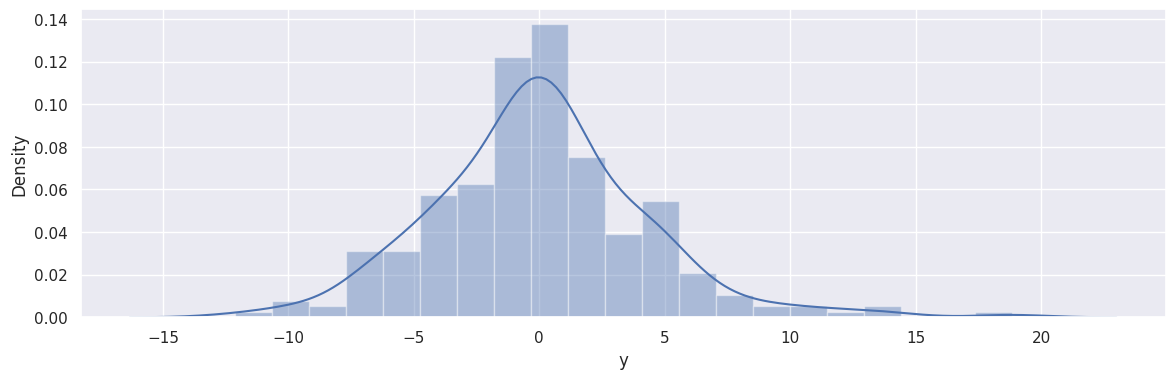

In [64]:
prophetdf = pd.DataFrame(columns=['ds','y'])
prophetdf['y'] = googletrends['Hulu: (United States)']
prophetdf['ds'] = googletrends.index

Xdf = pd.DataFrame()
Xdf['total_adspend'] = googletrends['TOTAL ADSPEND']
Xdf['smoothed_total_adspend'] = adspend_trend

m = Prophet()
m.add_country_holidays(country_name='US')
m.fit(prophetdf)
future = m.make_future_dataframe(periods=0, freq='M')
forecast = m.predict(future)

Xdf['yearly'] = list(forecast['yearly'])
Xdf['holidays'] = list(forecast['holidays'])
Xdf['trend'] = list(forecast['trend'])

Xdf['AR - Lag 1'] = prophetdf['y'].shift(-1)

Xdf = Xdf.interpolate(method='linear', axis=0)

Xdf['additive_terms'] = list(forecast['additive_terms'])



X = Xdf.to_numpy()

allpredictors = list(Xdf.columns)

model = LassoLarsCV(cv=10, precompute=False)
model.fit(X,prophetdf['y'])

predictors_model=pd.DataFrame(allpredictors)
predictors_model.columns = ['label']
predictors_model['coeff'] = model.coef_

predictions = model.predict(X)
residuals = prophetdf['y'] - predictions
squarederror = residuals ** 2
mse = np.mean(squarederror)
mae = np.mean(np.abs(residuals))
durbinwatson = durbin_watson(residuals)

sns.distplot(residuals, hist=True, kde=True)

coefficients = []
for index, row in predictors_model.iterrows():
    if row['coeff'] > 0:
        # print(row.values)
        coefficients.append([row[0], row[1]])
coefficientsdf = pd.DataFrame(coefficients, columns=['X (predictor)', 'coefficient'])
print(coefficientsdf)
print('R-square training: {0}'.format(model.score(X,prophetdf['y'])))
print('MSE: {0}'.format(mse))
print('MAE: {0}'.format(mae))
print('Durbin-Watson: {0}'.format(durbinwatson))

In [60]:
predictors_model

,label,coeff
0,total_adspend,0.000200
1,smoothed_total_adspend,-0.000125
2,yearly,0.189784
3,holidays,0.000000
4,trend,0.718468
5,AR - Lag 1,0.308827
6,additive_terms,0.513324


The model suggests that the most important predictors are 'trend', 'additive_terms', 'yearly', 'AR - Lag 1', and 'total_adspend', while the predictors 'smoothed_total_adspend' and 'holidays' have coefficients that are effectively zero.

The output also shows the R-squared of 0.88, which means that 88% of the variance in the dependent variable can be explained by the dependent variables. 